#Import and important function

In [0]:
!pip install -q mne==0.17.0

#!pip install -U scikit-learn==0.20.2

import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

from mne.decoding import CSP
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import FastICA
from sklearn.pipeline import Pipeline
from scipy.fftpack import rfft
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_curve

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl

#Authenticate and create the PyDrive client.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#random state

np.random.seed(43)

import random
random.seed(43)

#subject labels
sub_ = np.array(['sub 1','sub 2','sub 3','sub 4','sub 5','sub 6','sub 7','sub 8','sub 9','sub 10',
                'sub 11','sub 12','sub 13','sub 14','sub 15','sub 16','sub 17','sub 18','sub 19','sub 20'])


#function to set margin for plot
def set_xmargin(ax, left=0.0, right=0.3):
    ax.set_xmargin(0)
    ax.autoscale_view()
    lim = ax.get_xlim()
    delta = np.diff(lim)
    left = lim[0] - delta*left
    right = lim[1] + delta*right
    ax.set_xlim(left,right)
    

#set parameters of plot

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
chup65=['Fc5','Fc3','C5','C3','Cp5','Cp3','Af7','F7','F5','F8','Ft7','T7','T9','Tp7','P7']
chup70=['C5','F7','Ft7','T7','T9','Tp7']

good_subjects = [1,2,3,6,7,9,15,18,20]
subjects = range(1,11,1)
subjects_20 = range(1,21,1)


from Data import Data
from Classifier import Classifier
from DecisionTree import DecisionTree
from KNN import KNN
from LDA import LDA
from  import
from  import
from  import
from  import
from  import

In [0]:
#For loading Data From Drive

import os
local_download_path = os.path.expanduser('data')
try:
  os.makedirs(local_download_path)
except: pass
file_list = drive.ListFile({'q': "'1o0LWG6a9QlQnbs7kSe7epYsiTwRWGaVX' in parents"}).GetList()

for f in file_list:
  files = drive.ListFile({'q': "'"+f['id']+"' in parents"}).GetList()
  local_download_path = os.path.expanduser(f['title'])
  try:
    os.makedirs("data/"+local_download_path)
  except: pass
  
  for file in files:
    downloaded = drive.CreateFile({'id': file['id']}) # replace the id with id of file you want to access
    downloaded.GetContentFile("data/"+local_download_path+"/"+file['title']) 

names =os.listdir("data")

#Best Run with best parameters for each classifier (Offline Dataset)


### SVM

####Dependant

In [0]:
#all without pick any channels (64 Channels) acc =83%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
svc = SVM(kernel='linear',C=2.0)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 With ICA acc =78% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
data.pick_channel(chup65)
svc = SVM(kernel='linear',C=2.0)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_svc65 ,s_test_svc65 ,m_train_svc65 ,s_train_svc65  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
71 events found
Event IDs: [1 2 3]
45 matching events found
No baseline correction 

In [0]:
#Region 2 With ICA acc =73% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
data.pick_channel(chup70)
svc = SVM(kernel='linear',C=2.0)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_svc70 ,s_test_svc70 ,m_train_svc70 ,s_train_svc70  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

####Concatenate

#####20 Subjects

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=83%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_svc ,all_s_test_svc ,all_m_train_svc ,all_s_train_svc  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With ICA acc=82%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_svc65 ,all_s_test_svc65 ,all_m_train_svc65 ,all_s_train_svc65  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) With ICA acc=76%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_svc70 ,all_s_test_svc70 ,all_m_train_svc70 ,all_s_train_svc70  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc=91%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_svc ,good_s_test_svc ,good_m_train_svc ,good_s_train_svc  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R1

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With ICA acc=92%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_svc65 ,good_s_test_svc65 ,good_m_train_svc65 ,good_s_train_svc65  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With ICA acc=85%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
svm = SVM(kernel='linear',C=2.0)
clas = Classifier(svm)
pre = Preprocess()
pre.ICA(n_components=6)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_svc70 ,good_s_test_svc70 ,good_m_train_svc70 ,good_s_train_svc70  = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#subjects = range(1,21,1) # all acc = 83% chup70 acc=75% chup65 acc=82%
#subjects = [3,6,7,9,12,15,18] #upper 90% acc = 95% chup70 acc=83% chup65 acc=92%
#subjects = [1,2,3,6,7,9,12,15,18,20] #upper 80% acc = 91% chup70 acc=82% chup65 acc=90%

####Ploting SVM

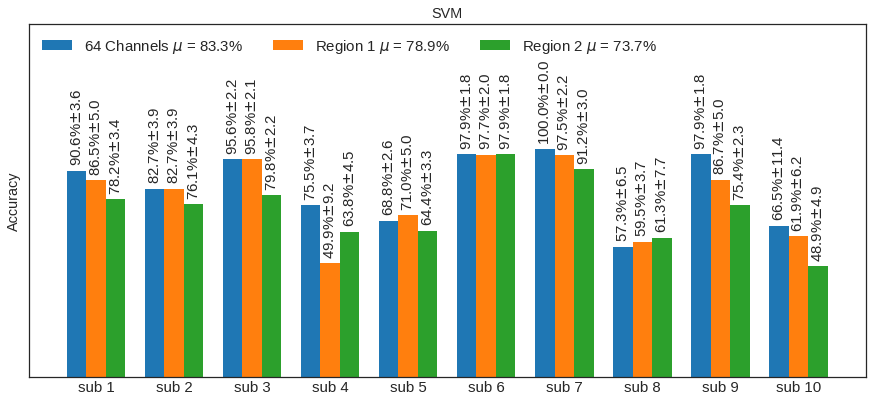

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))
plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('SVM')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_svc ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_svc65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_svc70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_svc)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_svc65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_svc70)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('svm.png')

###NaiveBayes

####Dependant

In [0]:
#all without pick any channels (64 Channels) acc =80%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 With PCA acc =76% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_NB65 ,s_test_NB65 ,m_train_NB65 ,s_train_NB65 = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 2 without PCA acc = 78% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
m_test_NB70 ,s_test_NB70 ,m_train_NB70 ,s_train_NB70 = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

####Concatenate

#####20 Subject

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=71%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_NB ,all_s_test_NB ,all_m_train_NB ,all_s_train_NB = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With PCA acc=70%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_NB65 ,all_s_test_NB65 ,all_m_train_NB65 ,all_s_train_NB65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physio

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) Without PCA acc=73%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_NB70 ,all_s_test_NB70 ,all_m_train_NB70 ,all_s_train_NB70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physio

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc = 82%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_NB ,good_s_test_NB ,good_m_train_NB ,good_s_train_NB = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With PCA acc = 80%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_NB65 ,good_s_test_NB65 ,good_m_train_NB65 ,good_s_train_NB65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 2) Without PCA acc =84 %
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_NB70 ,good_s_test_NB70 ,good_m_train_NB70 ,good_s_train_NB70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#subjects = range(1,21,1) # all acc =71.5% chup70 acc=73.7% chup65 acc=69.9%
#subjects = [3,7,9,15,18] #upper 90% acc =81.9 % chup70 acc=78.7% chup65 acc=86.7%
#subjects = [1,2,3,6,7,9,15,18,19,20] #upper 80% acc =78.9 % chup70 acc=82.8% chup65 acc=79.3%

####Ploting  Naive Bayes

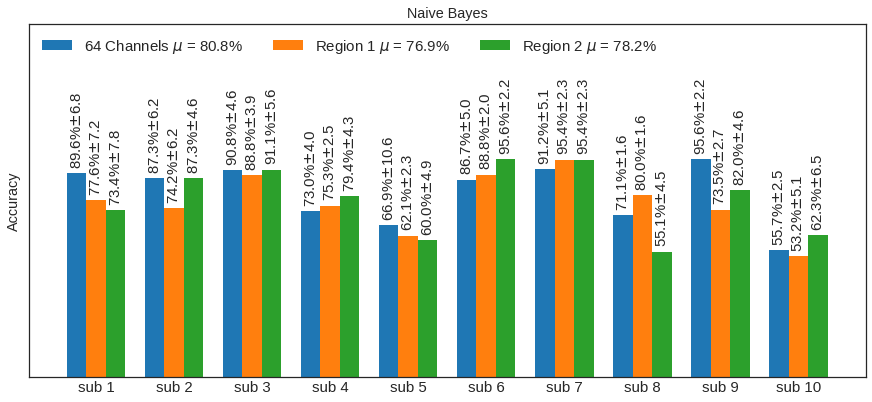

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))
plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('Naive Bayes')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_NB ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_NB65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_NB70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_NB)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_NB65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_NB70)*100,decimals=1))+'%'
       ) 

ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('NaiveBayes.png')

###KNN

####Dependant

In [0]:
#all without pick any channels (64 Channels) acc =77%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 With ICA acc =74% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_knn65 ,s_test_knn65 ,m_train_knn65 ,s_train_knn65 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
71 events found
Event IDs: [1 2 3]
45 matching events found
No baseline correction 

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 2 without ICA acc = 65% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_knn70 ,s_test_knn70 ,m_train_knn70 ,s_train_knn70 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
71 events found
Event IDs: [1 2 3]
45 matching events found
No baseline correction applied
Not setting metadata
0 projection items ac

####Concatenate

#####20 Subjects

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=77%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_knn ,all_s_test_knn ,all_m_train_knn ,all_s_train_knn = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With ICA acc=76%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_knn65 ,all_s_test_knn65 ,all_m_train_knn65 ,all_s_train_knn65 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) With ICA acc=68%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_knn70 ,all_s_test_knn70 ,all_m_train_knn70 ,all_s_train_knn70 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc=88%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_knn ,good_s_test_knn ,good_m_train_knn ,good_s_train_knn = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With ICA acc=83%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_knn65 ,good_s_test_knn65 ,good_m_train_knn65 ,good_s_train_knn65 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 2) With ICA acc=76%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_knn70 ,good_s_test_knn70 ,good_m_train_knn70 ,good_s_train_knn70 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#subjects = [5,7,9,15,18,20] #upper 90%  acc=90%
#subjects = [5,7,9,15,18,20,1,2,3,4,6,12] #upper 80%  acc=89%
#subjects = range(1,21,1) # 85%

####Ploting KNN

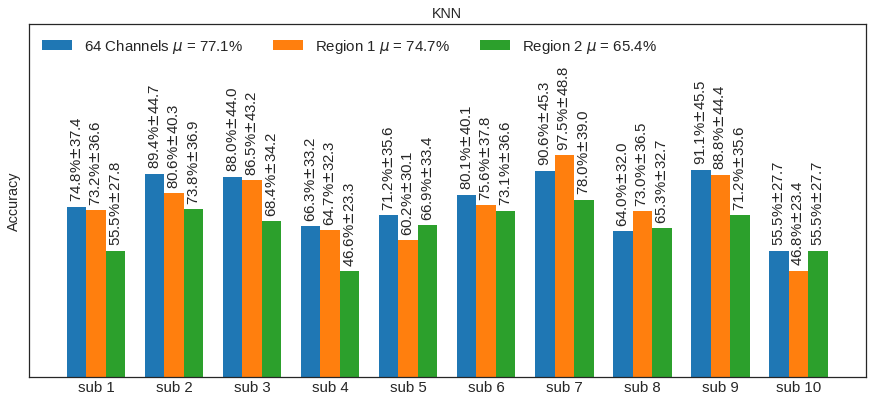

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))
plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('KNN')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_knn ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(m_test_knn[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_knn65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(m_test_knn65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_knn70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(m_test_knn70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_knn)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_knn65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_knn70)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('knn.png')

###Logistic Regression

####Dependent

In [0]:
#all without pick any channels (64 Channels) acc =81%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 With ICA acc =77% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_log65 ,s_test_log65 ,m_train_log65 ,s_train_log65  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 2 without ICA acc = 76% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
m_test_log70 ,s_test_log70 ,m_train_log70 ,s_train_log70  = sess.cross_val_sub(4,subjects)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

####Conctenate

#####20 Subjects

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=82%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=11)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_log ,all_s_test_log ,all_m_train_log ,all_s_train_log = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physio

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With ICA acc=77%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=11)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_log65 ,all_s_test_log65 ,all_m_train_log65 ,all_s_train_log65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) Without ICA Just FFT acc=76%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_log70 ,all_s_test_log70 ,all_m_train_log70 ,all_s_train_log70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc=91%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=11)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_log ,good_s_test_log ,good_m_train_log ,good_s_train_log = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With ICA acc=89%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=11)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_log65 ,good_s_test_log65 ,good_m_train_log65 ,good_s_train_log65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 2) Without ICA acc=86%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_log70 ,good_s_test_log70 ,good_m_train_log70 ,good_s_train_log70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#subjects = range(1,21,1) # all acc =% chup70 acc=% chup65 acc=%
#subjects = [3,6,7,9,15,18] #upper 90% acc =% chup70 acc=% chup65 acc=%
#subjects = [1,2,3,6,7,9,15,18,19] #upper 80% acc =91.8% chup70 acc=% chup65 acc=87.1%

####Ploting Logistic Regression

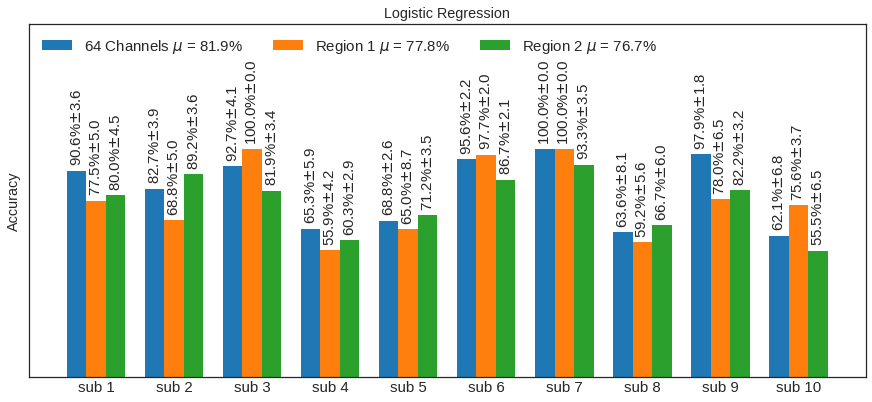

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))

plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('Logistic Regression')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_log ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_log65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_log70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_log)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_log65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_log70)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('LOG.png')

###LDA

####Dependant

In [0]:
#all without pick any channels (64 Channels) acc = 86% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 With PCA acc = 83% 
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_lda65 ,s_test_lda65 ,m_train_lda65 ,s_train_lda65 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 2 without PCA acc = 77%  
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
m_test_lda70 ,s_test_lda70 ,m_train_lda70 ,s_train_lda70 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

####Conctenated

#####20 Subjects

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=83%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_lda ,all_s_test_lda ,all_m_train_lda ,all_s_train_lda = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With PCA acc=80%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_lda65 ,all_s_test_lda65 ,all_m_train_lda65 ,all_s_train_lda65 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) Without PCA Just FFT acc=76%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_lda70 ,all_s_test_lda70 ,all_m_train_lda70 ,all_s_train_lda70 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc = 93% 
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_lda ,good_s_test_lda ,good_m_train_lda ,good_s_train_lda = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physio

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With PCA acc = 90% 
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(n_components=13)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_lda65 ,good_s_test_lda65 ,good_m_train_lda65 ,good_s_train_lda65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 2) Without PCA Just FFT acc = 84% 
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_lda70 ,good_s_test_lda70 ,good_m_train_lda70 ,good_s_train_lda70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#subjects =[3,6,7,9,15,18,19] #uperr 90  acc = 94% chup70 acc=84.8% chup65 acc=91.1%
#subjects =[3,6,7,9,15,18,19,1,2,4,20] #upper 80  acc = 90.6% chup70 acc=84% chup65 acc=88.6%
#subjects = range(1,21,1) # all acc = 83% chup70 acc=76.2% chup65 acc=81.5%

####Ploting LDA

In [0]:
np.around(np.array(m_test_dt70)*100,decimals=1)

array([71.5, 71.3, 73.4, 58.2, 66.5, 86.9, 86.1, 50.3, 73.1, 60.2])

In [0]:
np.around(np.array(s_test_dt70)*100/2,decimals=1)

array([ 4. ,  3.3,  5.1,  5.5,  2.5,  4.7,  4.6,  6.6,  5.7, 10.1])

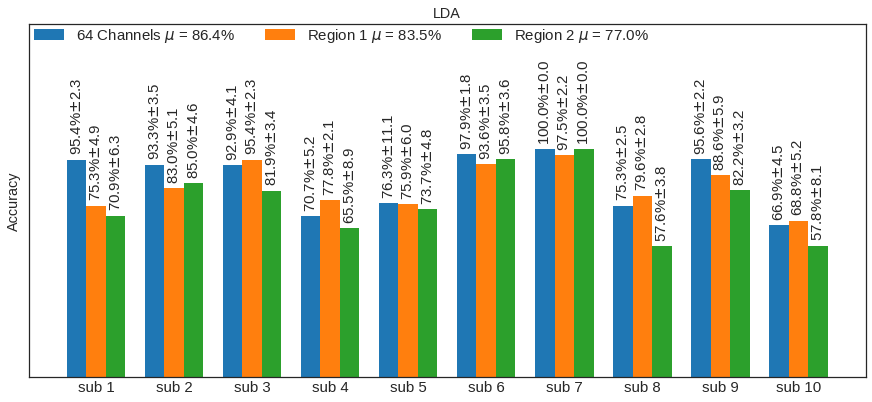

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))
plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)

ax.set_title('LDA')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_lda ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_lda65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_lda70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_lda)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_lda65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_lda70)*100,decimals=1))+'%'
       )
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,bbox_to_anchor=(-0.01,.03,1,1),fontsize=font, ncol =3)
plt.savefig('LDA.png')

### Desion Tree

####Dependant

In [0]:
#all without pick any channels (64 Channels) acc=73%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_dt ,s_test_dt ,m_train_dt ,s_train_dt = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

In [0]:
#Region 1 using ICA acc = 70%
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_dt65 ,s_test_dt65 ,m_train_dt65 ,s_train_dt65 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this eve

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations desc

In [0]:
#Region 2 without ICA just FFT acc=67%                
data = Data(subject=1,run=[4, 8, 12])
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.fft(10)
sess = Session(data,pre,clas)
m_test_dt70 ,s_test_dt70 ,m_train_dt70 ,s_train_dt70 = sess.cross_val_sub(4,subjects) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

####Concatenate 

#####20 subject

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels)  acc=70%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_dt ,all_s_test_dt ,all_m_train_dt ,all_s_train_dt = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 1) With ICA acc=70%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_dt65 ,all_s_test_dt65 ,all_m_train_dt65 ,all_s_train_dt65 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate 20 subject (Region 2) Without ICA Just FFT acc=67%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(subjects_20)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
#pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
all_m_test_dt70 ,all_s_test_dt70 ,all_m_train_dt70 ,all_s_train_dt70 = sess.cross_val(10)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S008/S008R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S010/S010R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S011/S011R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S012/S012R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S013/S013R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S014/S014R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S016/S016R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S017/S017R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S019/S019R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1439 events found
Event IDs: [1 2 3]
900 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 900 events and 641 original time points ...
0 bad epochs dropped
Start session


#####Good Subjects

In [0]:
#concatenate Good subject Without picking any Channels (64 Channels) acc=83%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_dt ,good_s_test_dt ,good_m_train_dt ,good_s_train_dt = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF 

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 1) With ICA acc = 83%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup65)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_dt65 ,good_s_test_dt65 ,good_m_train_dt65 ,good_s_train_dt65 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiob

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


In [0]:
#concatenate Good subject (Region 2) Without ICA Just FFT acc=72%
data = Data(subject=1,run=[4, 8, 12])
data.raw_data_all(good_subjects)
data.get_epochs()
data.pick_channel(chup70)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(10)
sess = Session(data,pre,clas)
good_m_test_dt70 ,good_s_test_dt70 ,good_m_train_dt70 ,good_s_train_dt70 = sess.cross_val(10) 

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R12.edf...
EDF file detected
EDF a

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R12.edf...
EDF file detected


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', '

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S006/S006R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]



Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S007/S007R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R0

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S009/S009R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events(

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S015/S015R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S018/S018R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R04.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure.

<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R08.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S020/S020R12.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']


<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]
<ipython-input-316-719c9a5bc4eb>:101: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raws_data = [read_raw_edf(f, preload=True) for f in files_names]


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
647 events found
Event IDs: [1 2 3]
405 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 405 events and 641 original time points ...
0 bad epochs dropped
Start session


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 6
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 6
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 6
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 6
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it

In [0]:
#subjects =[3,6,7,15] #upper90% acc= 95%
#subjects =[3,6,7,15,4,5,9,12,18] #upper 80% acc=87%

####Ploting Decision Tree

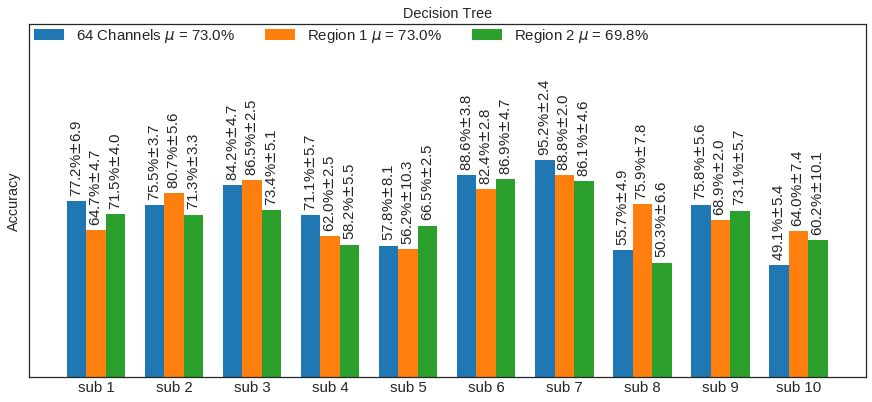

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 6.5))
plt.ylim(0.0, 1.55)
w=0.25
font = 15
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)

ax.set_title('Decision Tree')
ax.set_xticks(np.array(subjects)+2*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_dt ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_dt65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar3 = ax.bar(np.array(subjects)+2*w, m_test_dt70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('64 Channels $\mu$ = '+str(np.around(np.mean(m_test_dt)*100,decimals=1))+'%',
        'Region 1 $\mu$ = '+str(np.around(np.mean(m_test_dt65)*100,decimals=1))+'%',
        'Region 2 $\mu$ = '+str(np.around(np.mean(m_test_dt70)*100,decimals=1))+'%'
       )
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,bbox_to_anchor=(-0.01,.03,1,1),fontsize=font, ncol =3)
plt.savefig('DT.png')

##Graph For Concatenated data

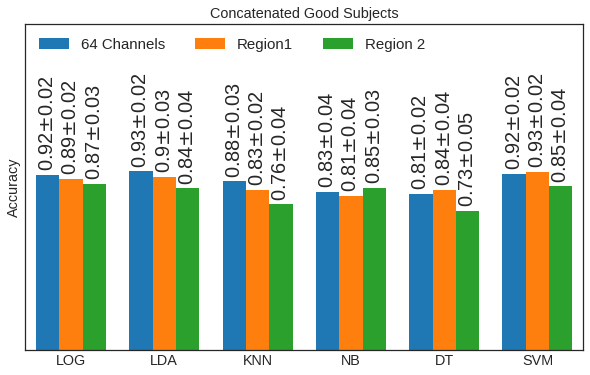

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylim(0.0, 1.7)
w=.25
font = 20
x = range(1,7,1)
y = [good_m_test_log,good_m_test_lda,good_m_test_knn,good_m_test_NB,good_m_test_dt,good_m_test_svc]
y_std =[good_s_test_log,good_s_test_lda,good_s_test_knn,good_s_test_NB,good_s_test_dt,good_s_test_svc]
y65 = [good_m_test_log65,good_m_test_lda65,good_m_test_knn65,good_m_test_NB65,good_m_test_dt65,good_m_test_svc65]
y65_std =[good_s_test_log65,good_s_test_lda65,good_s_test_knn65,good_s_test_NB65,good_s_test_dt65,good_s_test_svc65]
y70 = [good_m_test_log70,good_m_test_lda70,good_m_test_knn70,good_m_test_NB70,good_m_test_dt70,good_m_test_svc70]
y70_std =[good_s_test_log70,good_s_test_lda70,good_s_test_knn70,good_s_test_NB70,good_s_test_dt70,good_s_test_svc70]
x_ticks = ['LOG','LDA','KNN','NB','DT','SVM']
plt.xticks(np.array(x), x_ticks)
plt.yticks([])
ax.set(ylabel='Accuracy')
ax.set_xticks(np.array(x)+2*w/ 2)
ax.set_title("Concatenated Good Subjects")
bar1 = ax.bar(x, y ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar2 = ax.bar(np.array(x)+w, y65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y65_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)    
    

bar3 = ax.bar(np.array(x)+2*w, y70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y70_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)    
    
    
labels=('64 Channels','Region1','Region 2') 
set_xmargin(ax, left=0.02, right=0.02)
ax.legend( labels , loc=2 ,fontsize=15, ncol =3)
plt.savefig('good_concatenated.png')

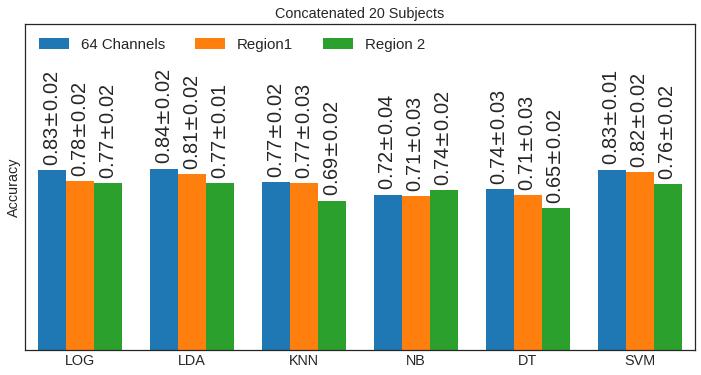

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0.0, 1.5)
w=.25
font = 20
x = range(1,7,1)
y = [all_m_test_log,all_m_test_lda,all_m_test_knn,all_m_test_NB,all_m_test_dt,all_m_test_svc]
y_std =[all_s_test_log,all_s_test_lda,all_s_test_knn,all_s_test_NB,all_s_test_dt,all_s_test_svc]
y65 = [all_m_test_log65,all_m_test_lda65,all_m_test_knn65,all_m_test_NB65,all_m_test_dt65,all_m_test_svc65]
y65_std =[all_s_test_log65,all_s_test_lda65,all_s_test_knn65,all_s_test_NB65,all_s_test_dt65,all_s_test_svc65]
y70 = [all_m_test_log70,all_m_test_lda70,all_m_test_knn70,all_m_test_NB70,all_m_test_dt70,all_m_test_svc70]
y70_std =[all_s_test_log70,all_s_test_lda70,all_s_test_knn70,all_s_test_NB70,all_s_test_dt70,all_s_test_svc70]
x_ticks = ['LOG','LDA','KNN','NB','DT','SVM']
plt.xticks(np.array(x), x_ticks)
plt.yticks([])
ax.set(ylabel='Accuracy')
ax.set_xticks(np.array(x)+2*w/ 2)
ax.set_title("Concatenated 20 Subjects")
bar1 = ax.bar(x, y ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    
bar2 = ax.bar(np.array(x)+w, y65 ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y65_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)    
    

bar3 = ax.bar(np.array(x)+2*w, y70 ,w,capsize=5,align='center')
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height,decimals=2))+'$\pm$'+str(np.around(y70_std[i]/2,decimals=2)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)    
    
    
labels=('64 Channels','Region1','Region 2') 
set_xmargin(ax, left=0.02, right=0.02)
ax.legend( labels , loc=2 ,fontsize=15, ncol =3)
plt.savefig('all_concatenated.png')

##Graph for all Classes

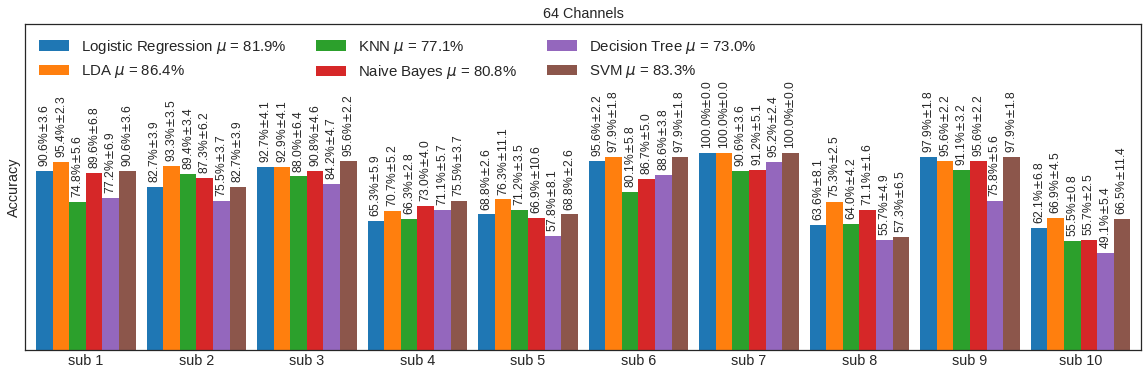

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20, 6))
plt.ylim(0.0, 1.65)
w=.15
font = 12
#,rotation='vertical'
plt.xticks(subjects, sub_)
plt.yticks([])
ax.set_xticks(np.array(subjects)+5*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_log ,w,capsize=5,align='center')
bar2 = ax.bar(np.array(subjects)+w, m_test_lda ,w,capsize=5,align='center')
bar3 = ax.bar(np.array(subjects)+2*w, m_test_knn ,w,capsize=5,align='center')
bar4 = ax.bar(np.array(subjects)+3*w, m_test_NB ,w,capsize=5,align='center')
bar5 = ax.bar(np.array(subjects)+4*w, m_test_dt ,w,capsize=5,align='center')
bar6 = ax.bar(np.array(subjects)+5*w, m_test_svc ,w,capsize=5,align='center')

for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
  
    
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_knn[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar4):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar5):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar6):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
labels=('Logistic Regression $\mu$ = '+str(np.around(np.mean(m_test_log)*100,decimals=1))+'%',
        'LDA $\mu$ = '+str(np.around(np.mean(m_test_lda)*100,decimals=1))+'%',
        'KNN $\mu$ = '+str(np.around(np.mean(m_test_knn)*100,decimals=1))+'%',
        'Naive Bayes $\mu$ = '+str(np.around(np.mean(m_test_NB)*100,decimals=1))+'%',
        'Decision Tree $\mu$ = '+str(np.around(np.mean(m_test_dt)*100,decimals=1))+'%',
        'SVM $\mu$ = '+str(np.around(np.mean(m_test_svc)*100,decimals=1))+'%') 

ax.set_title('64 Channels')

ax.set(ylabel='Accuracy')
set_xmargin(ax, left=0.01, right=0.01)
ax.legend( labels , loc=2 ,fontsize=15, ncol =3)
plt.savefig('all.png')

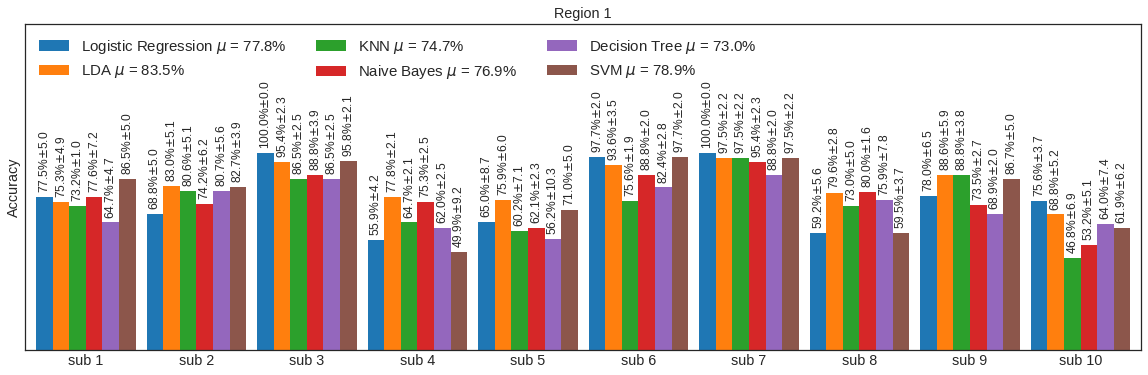

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20, 6))
plt.ylim(0.0, 1.65)
w=.15
font = 12
#,rotation='vertical'
plt.xticks(subjects, sub_)
plt.yticks([])
ax.set_xticks(np.array(subjects)+5*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_log65 ,w,capsize=5,align='center')
bar2 = ax.bar(np.array(subjects)+w, m_test_lda65 ,w,capsize=5,align='center')
bar3 = ax.bar(np.array(subjects)+2*w, m_test_knn65 ,w,capsize=5,align='center')
bar4 = ax.bar(np.array(subjects)+3*w, m_test_NB65 ,w,capsize=5,align='center')
bar5 = ax.bar(np.array(subjects)+4*w, m_test_dt65 ,w,capsize=5,align='center')
bar6 = ax.bar(np.array(subjects)+5*w, m_test_svc65 ,w,capsize=5,align='center')

for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
  
    
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_knn65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar4):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar5):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar6):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc65[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
labels=('Logistic Regression $\mu$ = '+str(np.around(np.mean(m_test_log65)*100,decimals=1))+'%',
        'LDA $\mu$ = '+str(np.around(np.mean(m_test_lda65)*100,decimals=1))+'%',
        'KNN $\mu$ = '+str(np.around(np.mean(m_test_knn65)*100,decimals=1))+'%',
        'Naive Bayes $\mu$ = '+str(np.around(np.mean(m_test_NB65)*100,decimals=1))+'%',
        'Decision Tree $\mu$ = '+str(np.around(np.mean(m_test_dt65)*100,decimals=1))+'%',
        'SVM $\mu$ = '+str(np.around(np.mean(m_test_svc65)*100,decimals=1))+'%') 

ax.set(ylabel='Accuracy')
ax.set_title('Region 1')
set_xmargin(ax, left=0.01, right=0.01)
ax.legend( labels , loc=2 ,fontsize=15, ncol =3)
plt.savefig('Region1.png')

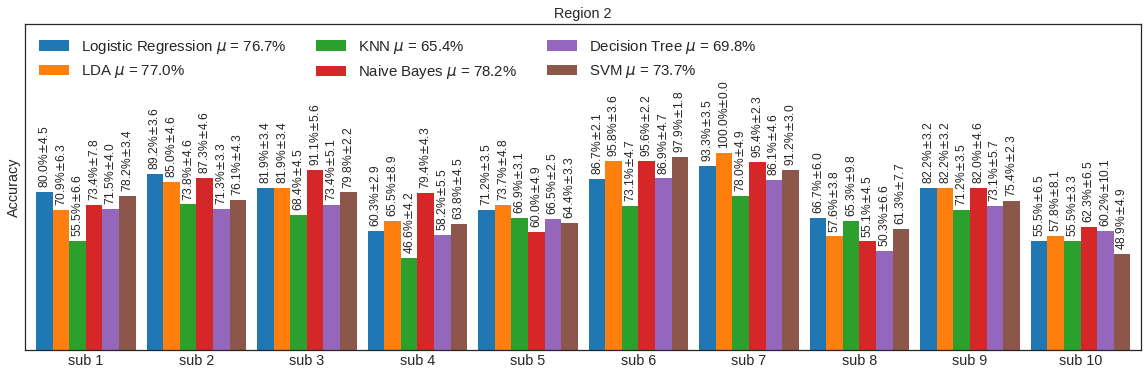

In [0]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20, 6))
plt.ylim(0.0, 1.65)
w=.15
font = 12
#,rotation='vertical'
plt.xticks(subjects, sub_)
plt.yticks([])
ax.set_xticks(np.array(subjects)+5*w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_log70 ,w,capsize=5,align='center')
bar2 = ax.bar(np.array(subjects)+w, m_test_lda70 ,w,capsize=5,align='center')
bar3 = ax.bar(np.array(subjects)+2*w, m_test_knn70 ,w,capsize=5,align='center')
bar4 = ax.bar(np.array(subjects)+3*w, m_test_NB70 ,w,capsize=5,align='center')
bar5 = ax.bar(np.array(subjects)+4*w, m_test_dt70 ,w,capsize=5,align='center')
bar6 = ax.bar(np.array(subjects)+5*w, m_test_svc70 ,w,capsize=5,align='center')

for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
  
    
for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_knn70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar4):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar5):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_dt70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

for i, rect in enumerate(bar6):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc70[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

    
labels=('Logistic Regression $\mu$ = '+str(np.around(np.mean(m_test_log70)*100,decimals=1))+'%',
        'LDA $\mu$ = '+str(np.around(np.mean(m_test_lda70)*100,decimals=1))+'%',
        'KNN $\mu$ = '+str(np.around(np.mean(m_test_knn70)*100,decimals=1))+'%',
        'Naive Bayes $\mu$ = '+str(np.around(np.mean(m_test_NB70)*100,decimals=1))+'%',
        'Decision Tree $\mu$ = '+str(np.around(np.mean(m_test_dt70)*100,decimals=1))+'%',
        'SVM $\mu$ = '+str(np.around(np.mean(m_test_svc70)*100,decimals=1))+'%') 

ax.set(ylabel='Accuracy')
ax.set_title('Region 2')
set_xmargin(ax, left=0.01, right=0.01)
ax.legend( labels , loc=2 ,fontsize=15, ncol =3)
plt.savefig('Region2.png')

#Best Run with best parameters for each classifier (Recorded Dataset)
Fixed Filter .5 to 40 Hz

In [0]:
#LDA CSP FFT 
np.random.seed(43)
good_lda_csp_fft = ['essam','abdelatif','ahmed','mohammed ashraf']
#                    0.8500000000000001	0.65     	0.675	0.6               
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LOG FFT
good_log_fft = ['omer','essam','hossne','abdelatif','ahmed','ahmed gamal','mohammed ashraf']
#0.625             	0.6749999999999999	0.6               	0.6               	0.625             	0.625      	0.6000000000000001

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(11)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#NB PCA 
np.random.seed(43)
good_nb_pca = ['omer','abdelatif','ahmed','lahzy']
#               0.7               	0.6               	0.775             	0.625                           
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(7)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#KNN CSP FFT
np.random.seed(43)
good_knn_csp_fft = ['essam','abdelatif','ahmed','mohammed ashraf']
#                   0.625              	0.7749999999999999	0.6               	0.6                
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=13,transform_into ='csp_space')
pre.fft(9)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#SVM FFT
np.random.seed(43)
good_svm_fft = ['hossne','omer','mohammed ashraf','essam','ahmed','lahzy']
#                0.6      0.625  0.675             0.674	 0.6	   0.75                             
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#LDA CSP FFT 
np.random.seed(43)
good_lda_csp_fft = ['omer','essam','hossne','ahmed','lahzy','mohammed ashraf']
#4 0.6749999999999999	0.75              	0.575             	0.6000000000000001	0.6               	0.7000000000000001
#5 0.675             	0.7               	0.6               	0.675             	0.65              	0.6000000000000001
#7 0.625             	0.7750000000000001	0.6               	0.6749999999999999	0.65              	0.6               

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.CSP(n_components=7,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_lda_r ,s_test_lda_r ,m_train_lda_r ,s_train_lda_r = sess.cross_val_sub(4,names)

In [0]:
subjects = range(1,17,1)
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0.0, 1.2)
w=0.35
font = 13
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('Linear Discriminant A')
ax.set_xticks(np.array(subjects)+w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_lda ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_lda_r ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_lda_r[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('14 Channels $\mu$ = '+str(np.around(np.mean(m_test_lda)*100,decimals=1))+'%',
        'Region $\mu$ = '+str(np.around(np.mean(m_test_lda_r)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('KNN.png')

In [0]:
#KNN ICA 
np.random.seed(43)
good_knn_ica = ['essam','ahmed','lahzy','mohammed ashraf']
#6 0.7250000000000001	0.75              	0.7  	0.5499999999999999
#8 0.625             	0.75              	0.775	0.625             
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=8)
sess = Session(data,pre,clas)
m_test_knn_r ,s_test_knn_r ,m_train_knn_r ,s_train_knn_r = sess.cross_val_sub(4,names)

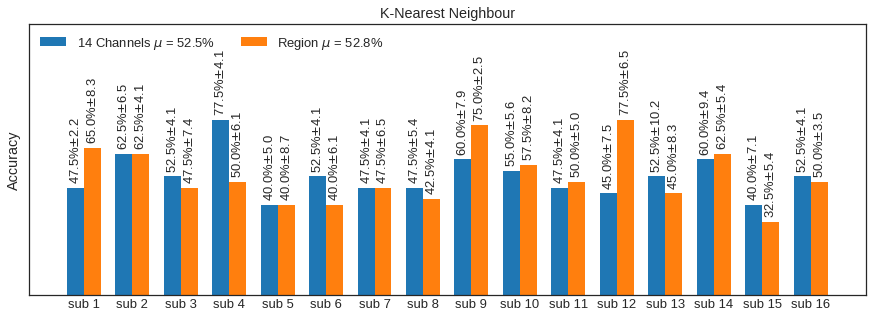

In [0]:
subjects = range(1,17,1)
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0.0, 1.2)
w=0.35
font = 13
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('K-Nearest Neighbour')
ax.set_xticks(np.array(subjects)+w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_knn ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_knn[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_knn_r ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_knn_r[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('14 Channels $\mu$ = '+str(np.around(np.mean(m_test_knn)*100,decimals=1))+'%',
        'Region $\mu$ = '+str(np.around(np.mean(m_test_knn_r)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('KNN.png')

In [0]:
#LOG CSP FFT
good_log_csp_fft = ['omer','essam','hossne','black','ahmed','lahzy','mohammed ashraf']
#0.7               	0.7500000000000001	0.5750000000000001	0.6  	0.65              	0.65               	0.6499999999999999

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.CSP(n_components=7,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_log_r ,s_test_log_r ,m_train_log_r ,s_train_log_r  = sess.cross_val_sub(4,names)

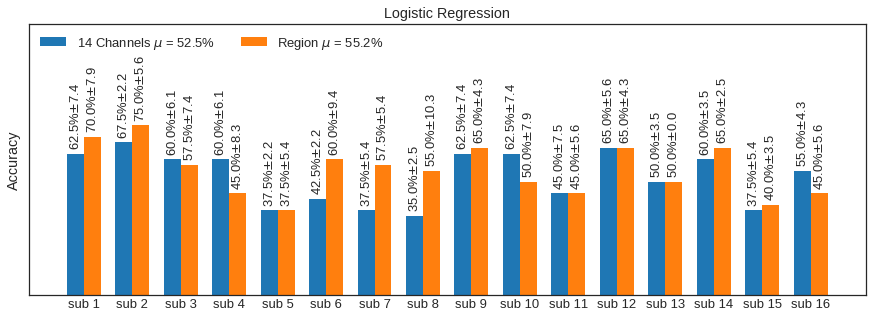

In [0]:
subjects = range(1,17,1)
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0.0, 1.2)
w=0.35
font = 13
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('Logistic Regression')
ax.set_xticks(np.array(subjects)+w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_log ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_log_r ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_log_r[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('14 Channels $\mu$ = '+str(np.around(np.mean(m_test_log)*100,decimals=1))+'%',
        'Region $\mu$ = '+str(np.around(np.mean(m_test_log_r)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('LOG.png')

In [0]:
#NB CSP Space 
np.random.seed(43)
good_nb_csp_space = ['omer','essam','ahmed','lahzy','mohammed ashraf']
#5 0.7749999999999999	0.5750000000000001	0.7250000000000001	0.6499999999999999	0.6749999999999999
#7 0.7749999999999999	0.5750000000000001	0.675             	0.6               	0.7250000000000001
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.CSP(n_components=5,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_NB_r ,s_test_NB_r ,m_train_NB_r ,s_train_NB_r = sess.cross_val_sub(4,names)

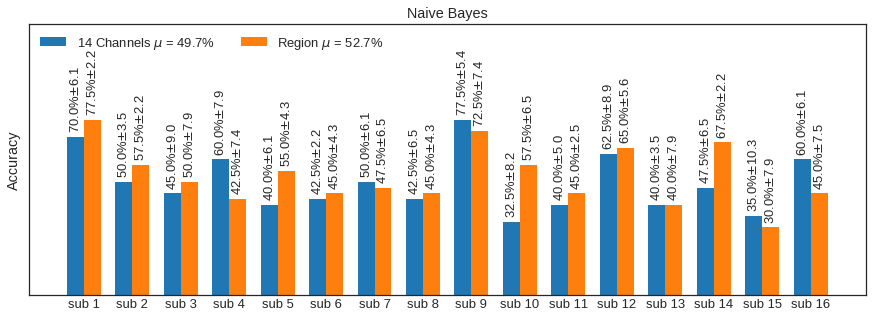

In [0]:
subjects = range(1,17,1)
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0.0, 1.2)
w=0.35
font = 13
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('Naive Bayes')
ax.set_xticks(np.array(subjects)+w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_NB ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_NB_r ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_NB_r[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('14 Channels $\mu$ = '+str(np.around(np.mean(m_test_NB)*100,decimals=1))+'%',
        'Region $\mu$ = '+str(np.around(np.mean(m_test_NB_r)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('NB.png')

In [0]:
#SVM FFT
np.random.seed(43)
good_svm_fft = ['omer','essam','lahzy','mohammed ashraf']
#                                          
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc_r ,s_test_svc_r ,m_train_svc_r ,s_train_svc_r  = sess.cross_val_sub(4,names)

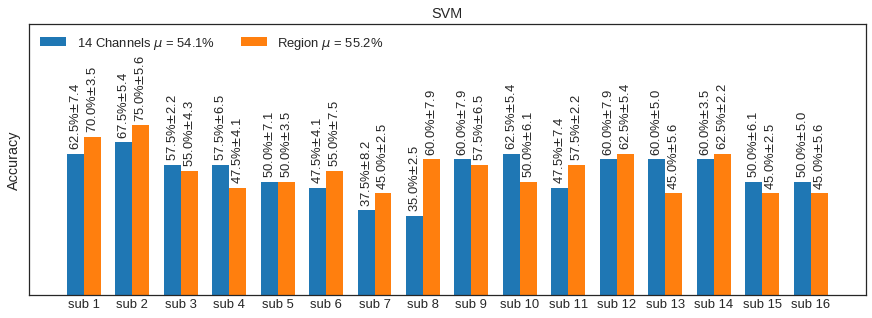

In [0]:
subjects = range(1,17,1)
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(15, 5))
plt.ylim(0.0, 1.2)
w=0.35
font = 13
ax.set_yticklabels([])
#rotation='vertical',
plt.xticks(subjects, sub_,fontsize=font)
ax.set_title('SVM')
ax.set_xticks(np.array(subjects)+w/ 2)
bar1 = ax.bar(np.array(subjects), m_test_svc ,w,capsize=5,align='center')
for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)

bar2 = ax.bar(np.array(subjects)+w, m_test_svc_r ,w,capsize=5,align='center')
for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+.02, str(np.around(height*100,decimals=1))+'%$\pm$'+str(np.around(s_test_svc_r[i]*100/2,decimals=1)),
             ha='center', va='bottom',rotation='vertical',fontsize=font)
    

labels=('14 Channels $\mu$ = '+str(np.around(np.mean(m_test_svc)*100,decimals=1))+'%',
        'Region $\mu$ = '+str(np.around(np.mean(m_test_svc_r)*100,decimals=1))+'%'
       ) 
ax.set(ylabel='Accuracy')
ax.legend(labels , loc=2 ,fontsize=font, ncol =3)
plt.savefig('svm.png')

##14 Channels

###LOG

In [0]:
#all without pick any channels (64 Channels) acc =81%
region =['essam' , 'mohammed ashraf' , 'omer'  , 'lahzy' , 'ahmed' ,  'shokry'  ]
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=8)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,region)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/LR02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Start session
Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Ba

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Reading 0 ... 25343  =      0.000 ...   197.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.7000000000000001, 0.65, 0.6749999999999999, 0.6, 0.47500000000000003, 0.575]

In [0]:
#LOG FFT
good_log_fft = ['omer','essam','hossne','abdelatif','ahmed','ahmed gamal','mohammed ashraf']
#0.625             	0.6749999999999999	0.6               	0.6               	0.625             	0.625      	0.6000000000000001

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(11)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_cha

Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/LR02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Basel

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25087  =      0.000 ...   195.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineSt

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart'

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Reading 0 ... 28415  =      0.000 ...   221.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:80: RuntimeWarning: Omitted 258 annotation(s) that were outside data range.
  self.raw = concatenate_raws(raws_data)
<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.6000000000000001,
 0.375,
 0.375,
 0.5,
 0.42500000000000004,
 0.6,
 0.55,
 0.625,
 0.65,
 0.45000000000000007,
 0.6,
 0.375,
 0.625,
 0.6749999999999999,
 0.35000000000000003,
 0.625]

In [0]:
#LOG ICA FFT
good_log_ica_fft = ['omer','essam','hossne','ahmed']
#9  0.6499999999999999	0.675              	0.625             	0.575             
#11 0.675             	0.6499999999999999 	0.625             	0.575             
#14 0.625             	0.7000000000000001 	0.575             	0.625             
################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA()
pre.fft(11)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_St

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25087  =      0.000 ...   195.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineSt

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart'

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.625,
 0.4,
 0.4,
 0.55,
 0.44999999999999996,
 0.575,
 0.55,
 0.55,
 0.6,
 0.425,
 0.575,
 0.4,
 0.625,
 0.7000000000000001,
 0.35,
 0.625]

In [0]:
#LOG PCA FFT
good_log_pca_fft = ['omer','essam','hossne','ahmed']
# 5 0.6499999999999999	0.625             	0.5499999999999999 	0.7               
# 8 0.675             	0.625             	0.625              	0.625             
#14 0.625             	0.7000000000000001	0.6                	0.625             
################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.PCA()
pre.fft(11)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/LR02.edf...
EDF file detected
EDF annota

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25087  =      0.000 ...   195.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineSt

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart'

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.6000000000000001,
 0.35,
 0.4,
 0.525,
 0.42500000000000004,
 0.6,
 0.575,
 0.575,
 0.625,
 0.42500000000000004,
 0.6,
 0.375,
 0.625,
 0.7000000000000001,
 0.325,
 0.625]

In [0]:
#LOG CSP FFT
good_log_csp_fft = ['omer','essam','abdelatif','ahmed']
#0.65              	0.75              	0.47500000000000003	0.75              

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.CSP(n_components=7,transform_into='csp_space')
pre.fft(11)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_St

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2380

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info struct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2406

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creat

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ..

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure..

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


In [0]:
m_test_log

[0.35,
 0.4,
 0.3,
 0.39999999999999997,
 0.6,
 0.5,
 0.425,
 0.45,
 0.525,
 0.5499999999999999,
 0.47500000000000003,
 0.525,
 0.75,
 0.75,
 0.375,
 0.65]

In [0]:
#LOG ICA
good_log_ica = ['omer','essam','ahmed','lahzy']
#0.675             	0.7250000000000001 	0.7               	0.6499999999999999 

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(10)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_St

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25087  =      0.000 ...   195.992 secs...


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f i

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/LR02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations de

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart'

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.30000000000000004,
 0.475,
 0.325,
 0.42500000000000004,
 0.35,
 0.5750000000000001,
 0.475,
 0.575,
 0.6499999999999999,
 0.19999999999999998,
 0.47500000000000003,
 0.5,
 0.7,
 0.7250000000000001,
 0.35000000000000003,
 0.675]

In [0]:
#LOG PCA
good_log_pca = ['omer','essam','ahmed','lahzy']
#9  0.7250000000000001	0.7000000000000001	0.7               	0.5999999999999999 
#10 0.675             	0.725             	0.725             	0.625              

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.PCA()
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_cha

Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/LR02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Basel

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 40 events and 513 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_Baseline

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVT

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25087  =      0.000 ...   195.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineSt

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart'

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   207.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


In [0]:
m_test_log

[0.47500000000000003,
 0.45000000000000007,
 0.27499999999999997,
 0.47500000000000003,
 0.3,
 0.55,
 0.525,
 0.5,
 0.65,
 0.275,
 0.475,
 0.525,
 0.675,
 0.675,
 0.35000000000000003,
 0.7]

In [0]:
#LOG CSP
good_log_csp = ['omer','essam','ahmed','lahzy']
#7 0.675             	0.75              	0.75              	0.625
#8 0.675             	0.7250000000000001	0.75              	0.65 

################################################################################

np.random.seed(43)
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GD

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Start session
Extracting EDF parameters from data/mohammed ashraf/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_St

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed ashraf/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline c

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/shokry/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30079  =      0.000 ...   234.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2380

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/shokry/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/turky/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD02.edf...
EDF fil

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/turky/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/yassin hatem/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info struct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/yassin hatem/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corr

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.

<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')



Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/black/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23935  =      0.000 ...   186.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creati

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/black/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/hossne/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ..

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/hossne/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23807  =      0.000 ...   185.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/medhat/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25471  =      0.000 ...   198.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creat

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/medhat/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24063  =      0.000 ...   187.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/ahmed gamal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info st

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed gamal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24831  =      0.000 ...   193.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline corre

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/lahzy/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract the

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/lahzy/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/teha/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24703  =      0.000 ...   192.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/teha/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL

<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')



Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/abdelatif/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29567  =      0.000 ...   230.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info struc

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abdelatif/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correct

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/abodonia/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extra

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/abodonia/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24959  =      0.000 ...   194.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correcti

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/ahmed/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25983  =      0.000 ...   202.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creatin

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/ahmed/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.

<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')



Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/essam/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25215  =      0.000 ...   196.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creati

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/essam/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24447  =      0.000 ...   190.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/mohammed abdelal/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25727  =      0.000 ...   200.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel inf

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/mohammed abdelal/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24319  =      0.000 ...   189.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Down', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Up', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Extracting EDF parameters from data/omer/LR01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Left', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Right', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD02.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating 

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Right', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Left', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
Extracting EDF parameters from data/omer/UD01.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26111  =      0.000 ...   203.992 secs...
Used Annotations descriptions: ['OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Label_00', 'OVTK_StimulationId_BaselineStart', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_Up', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Down', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train']
172 events found
Event IDs: [ 1  2  3  4  5  6  9 10]
40 matching events found
No baseline correction a

<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipython-input-3-fb0837162e9d>:79: RuntimeWarning: EDF+ with overlapping events are not fully supported
  raws_data = [read_raw_edf(self.path+"/"+f, preload=True,stim_channel="auto") for f in files]
<ipyt

0 bad epochs dropped
Setting up band-pass filter from 0.5 - 40 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 845 samples (6.602 sec) selected
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


<ipython-input-3-fb0837162e9d>:149: RuntimeWarning: filter_length (845) is longer than the signal (513), distortion is likely. Reduce filter length or filter a longer signal.
  self.epochs.filter(l_freq, h_freq, fir_design='firwin')


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


In [0]:
m_test_log

[0.325,
 0.42500000000000004,
 0.275,
 0.4,
 0.5,
 0.45,
 0.5,
 0.55,
 0.65,
 0.42500000000000004,
 0.35,
 0.525,
 0.75,
 0.7250000000000001,
 0.4,
 0.675]

###SVM

In [0]:
#SVM FFT
np.random.seed(43)
good_svm_fft = ['hossne','omer','mohammed ashraf','essam','ahmed','lahzy']
#                0.6      0.625  0.675             0.674	 0.6	   0.75                             
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM ICA FFT
np.random.seed(43)
good_svm_ica_fft = ['omer','mohammed ashraf','essam','ahmed']
#                    0.6    0.625             0.724	  0.649                  
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=12)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM PCA FFT
np.random.seed(43)
good_svm_pca_fft = ['omer','mohammed ashraf','essam','ahmed','lahzy']
#                    0.625  0.675             0.674	  0.6	    0.75                     
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.PCA(n_components=14)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM CSP FFT
np.random.seed(43)
good_svm_csp_fft = ['omer','mohammed ashraf','essam','ahmed','lahzy']
#                    0.625  0.675             0.674	  0.6	    0.75 
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.CSP(n_components=14,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM ICA
np.random.seed(43)
good_svm_ica = ['ahmed gamal','omer','ahmed']
#                0.675         0.7    0.8                                              
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
pre = Preprocess()
pre.ICA(n_components=10)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM PCA
np.random.seed(43)
good_svm_pca = ['ahmed gamal','omer','essam','ahmed']
#                0.675         0.674	0.625   0.825               
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.PCA(n_components=9)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM CSP Space 
np.random.seed(43)
good_svm_csp_space = ['omer','essam','ahmed']
#                      0.675  0.7     0.75                                    
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

###KNN

In [0]:
#KNN FFT 
np.random.seed(43)
good_knn_fft = ['abdelatif','black','ahmed','mohammed ashraf']
#0.7249999999999999	0.6                	0.65              	0.625             
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.fft(9)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)


In [0]:
#KNN ICA FFT 
np.random.seed(43)
good_knn_ica_fft = ['abdelatif','ahmed','black']
#                   0.7               	0.675             	0.5750000000000001
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(14)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN PCA FFT
np.random.seed(43)
good_knn_pca_fft = ['abdelatif','black','ahmed']
#                   0.7249999999999999	0.6  	0.65              
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.PCA(14)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN CSP FFT
np.random.seed(43)
good_knn_csp_fft = ['essam','abdelatif','ahmed','mohammed ashraf']
#                   0.625              	0.7749999999999999	0.6               	0.6                
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=13,transform_into ='csp_space')
pre.fft(9)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN ICA 
np.random.seed(43)
good_knn_ica = ['omer','essam','abdelatif','abodonia','ahmed']
#  5              0.6               	0.625              	0.525             	0.6                	0.75              
#  11             0.6               	0.675              	0.575             	0.575              	0.725              
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=5)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN PCA 
np.random.seed(43)
good_knn_pca = ['omer','essam','ahmed','lahzy']
#           0.6               	0.6749999999999999	0.675             	0.7                     
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.PCA(n_components=10)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN CSP Space
np.random.seed(43)
good_knn_csp_space = ['omer','essam','ahmed','lahzy']
#    0.6               	0.575             	0.7               	0.7                                  
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=8,transform_into ='csp_space')
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

###LDA

In [0]:
#LDA FFT
np.random.seed(43)
good_lda_fft = ['essam','abdelatif','mohammed ashraf','ahmed']
#               0.7               	0.6               	0.625              	0.65              
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA ICA FFT 
np.random.seed(43)
good_lda_ica_fft = ['essam','ahmed','abdelatif']
#           0.7               	0.65              	0.65                       
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.ICA(14)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA PCA FFT 
np.random.seed(43)
good_lda_pca_fft = ['essam','abdelatif','ahmed']
#                    0.7250000000000001 	0.675    	0.675              
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(14)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA CSP FFT 
np.random.seed(43)
good_lda_csp_fft = ['essam','abdelatif','ahmed','mohammed ashraf']
#                    0.8500000000000001	0.65     	0.675	0.6               
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA ICA
np.random.seed(43)
good_lda_ = []

In [0]:
#LDA PCA
np.random.seed(43)
good_lda_ = []

In [0]:
#LDA CSP Space
np.random.seed(43)
good_lda_ = []

###NB

In [0]:
#NB FFT 8
np.random.seed(43)
good_nb_fft = ['hossne','abdelatif','ahmed','ahmed gamal']
#            0.6749999999999999	0.65              	0.6499999999999999	0.5               
   
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.fft(16)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB ICA FFT 
np.random.seed(43)
good_nb_ica_fft = ['hossne','abdelatif','ahmed']
#                  0.6499999999999999 	0.625              	0.6499999999999999
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.ICA(14)
pre.fft(16)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB PCA FFT 
np.random.seed(43)
good_nb_pca_fft = ['abdelatif','ahmed','yassin hatem']
#          0.7      	0.625              	0.55        
         
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(3)
pre.fft(16)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB CSP FFT 
np.random.seed(43)
good_nb_csp_fft = ['omer','abdelatif','black']
#                  0.575             	0.675             	0.6749999999999999         
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.CSP(n_components=7,transform_into='csp_space')
pre.fft(16)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB ICA 
np.random.seed(43)
good_nb_ica = ['omer','essam','hossne','ahmed','lahzy']
#              0.675             	0.6499999999999999	0.625              	0.7               	0.6000000000000001
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.ICA(12)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB PCA 
np.random.seed(43)
good_nb_pca = ['omer','abdelatif','ahmed','lahzy']
#               0.7               	0.6               	0.775             	0.625                           
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA(7)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB CSP Space 
np.random.seed(43)
good_nb_csp_space = ['omer','ahmed','ahmed gamal','lahzy']
#                     0.7250000000000001	0.725             	0.6000000000000001 	0.6000000000000001    
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.CSP(n_components=14,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)


##Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]


###LOG

In [0]:
#LOG FFT
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG ICA FFT
good_log_ica = ['omer','essam','lahzy','mohammed ashraf' ]
#         0.7               	0.7749999999999999	0.6  	0.6000000000000001
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=9)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG PCA FFT
good_log_pca_fft = ['omer','essam','mohammed ashraf','shokry']
#5 0.6499999999999999	0.75              	0.625             	0.625 

#7 0.6749999999999999	0.7500000000000001	0.65              	0.575 

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.PCA(n_components=)
pre.fft()
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG CSP FFT
good_log_csp_fft = ['omer','essam','hossne','black','ahmed','lahzy','mohammed ashraf']
#0.7               	0.7500000000000001	0.5750000000000001	0.6  	0.65              	0.65               	0.6499999999999999

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.CSP(n_components=7,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG ICA
good_log_ica = ['omer','essam','ahmed','lahzy']
#6 0.75              	0.75              	0.7               	0.675             
#8 0.7               	0.7750000000000001	0.675             	0.7000000000000001

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG PCA
good_log_pca = ['omer','essam','ahmed','lahzy']
# 0.7  	0.775	0.7               	0.7250000000000001

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.PCA(n_components=8)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#LOG CSP
good_log_csp = ['omer','essam','ahmed','lahzy']
#0.7250000000000001	0.7250000000000001	0.7  	0.8               

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

np.random.seed(43)
################################################################################
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.CSP(n_components=5,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

###SVM

In [0]:
#SVM FFT
np.random.seed(43)
good_svm_fft = ['omer','essam','lahzy','mohammed ashraf']
#                                          
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM ICA FFT
np.random.seed(43)
good_svm_ica_fft = ['omer','essam','shokry','ahmed','lahzy','mohammed ashraf']
# 0.6000000000000001	0.7000000000000001	0.65              	0.625              	0.675             	0.625              
                                
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=5)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM PCA FFT
np.random.seed(43)
good_svm_pca_fft = ['omer','essam','shokry','lahzy','mohammed ashraf']
#4 0.675             	0.6               	0.7   	0.55 	0.7                
#6 0.675             	0.85              	0.575 	0.6  	0.5750000000000001 
#9 0.7               	0.75              	0.5   	0.625	0.625              
                                      
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.PCA(n_components=)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM CSP FFT
np.random.seed(43)
good_svm_csp_fft = ['omer','essam','ahmed','lahzy','mohammed ashraf']
#6 0.6749999999999999	0.8999999999999999	0.625             	0.65               	0.55              
#7 0.6749999999999999	0.775             	0.6749999999999999	0.65               	0.6499999999999999
#8 0.675             	0.8               	0.65              	0.625              	0.7               
                   
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.CSP(n_components=,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM ICA
np.random.seed(43)
good_svm_ica = ['omer','essam','ahmed','lahzy']
# 0.7249999999999999	0.7                	0.675             	0.7               
                                                           
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
data.get_data()
svc = SVM(kernel='linear',C=2)
pre = Preprocess()
pre.ICA(n_components=8)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM PCA
np.random.seed(43)
good_svm_pca = ['omer','essam','ahmed','lahzy']
#6 0.7749999999999999	0.75              	0.6749999999999999	0.675               
#8 0.7               	0.7750000000000001	0.7               	0.7000000000000001

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.PCA(n_components=9)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM CSP Space 
np.random.seed(43)
good_svm_csp_space = ['omer','essam','ahmed','lahzy']
#5 0.75              	0.675             	0.675	0.7999999999999999
#6 0.75              	0.7               	0.65 	0.75   
#7 0.8250000000000001	0.7               	0.6  	0.65              
#8 0.675             	0.7749999999999999	0.675	0.675             
#9 0.7               	0.65              	0.7  	0.75                                                     
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

###KNN

In [0]:
#KNN FFT 
np.random.seed(43)
good_knn_fft = ['','','','']

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)


In [0]:
#KNN ICA FFT 
np.random.seed(43)
good_knn_ica_fft = ['black','ahmed','ahmed gamal','lahzy']
#0.65              	0.6               	0.625             	0.75               

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(6)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN PCA FFT
np.random.seed(43)
good_knn_pca_fft = ['black','ahmed','ahmed gamal','lahzy']
#             0.7               	0.6               	0.675      	0.625             
        
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.PCA(5)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN CSP FFT
np.random.seed(43)
good_knn_csp_fft = ['omer','essam','black','ahmed']
#0.625              	0.7               	0.675             	0.675             

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=6,transform_into ='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN ICA 
np.random.seed(43)
good_knn_ica = ['essam','ahmed','lahzy','mohammed ashraf']
#6 0.7250000000000001	0.75              	0.7  	0.5499999999999999
#8 0.625             	0.75              	0.775	0.625             
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.ICA(n_components=8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN PCA 
np.random.seed(43)
good_knn_pca = ['omer','essam','ahmed','lahzy','mohammed ashraf']
#0.6  	0.65              	0.75              	0.775             	0.6               
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.PCA(n_components=8)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#KNN CSP Space
np.random.seed(43)
good_knn_csp_space = ['essam','ahmed','lahzy']
#0.6000000000000001	0.7750000000000001	0.675             

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=9,transform_into ='csp_space')
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

###NB

In [0]:
#NB FFT 8
np.random.seed(43)
good_nb_fft = ['omer','essam','black','abodonia','ahmed']
#0.7250000000000001 	0.625             	0.65              	0.6499999999999999	0.7000000000000001 
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.fft(9)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB ICA FFT 
np.random.seed(43)
good_nb_ica_fft = ['essam','hossne','abodonia','ahmed','lahzy']
#0.675             	0.675             	0.675             	0.6249999999999999	0.575
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.ICA(7)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB PCA FFT 
np.random.seed(43)
good_nb_pca_fft = ['omer','essam','hossne','ahmed','lahzy']
#5 0.6499999999999999	0.675              	0.625             	0.6000000000000001	0.5750000000000001
#9 0.625             	0.6000000000000001 	0.6499999999999999	0.675             	0.55              
         
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA()
pre.fft(9)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB CSP FFT 
np.random.seed(43)
good_nb_csp_fft = ['hossne','black','abodonia','ahmed gamal','lahzy','mohammed ashraf']
#0.675 	0.7               	0.625             	0.5               	0.5499999999999999	0.625             

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
pre.fft(9)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB ICA 
np.random.seed(43)
good_nb_ica = ['omer','essam','hossne','ahmed','lahzy','yassin hatem']
#0.7749999999999999	0.65 	0.6               	0.7               	0.6749999999999999	0.6499999999999999
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.ICA(9)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB PCA 
np.random.seed(43)
good_nb_pca = ['omer','ahmed','lahzy']
#8 0.65              	0.7               	0.675
#9 0.725             	0.7250000000000001	0.575
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.PCA()
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#NB CSP Space 
np.random.seed(43)
good_nb_csp_space = ['omer','essam','ahmed','lahzy','mohammed ashraf']
#5 0.7749999999999999	0.5750000000000001	0.7250000000000001	0.6499999999999999	0.6749999999999999
#7 0.7749999999999999	0.5750000000000001	0.675             	0.6               	0.7250000000000001
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.CSP(n_components=5,transform_into='csp_space')
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)


###LDA

In [0]:
#LDA FFT
np.random.seed(43)
good_lda_fft = ['omer','essam','','']
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.fft(8)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA ICA FFT 
np.random.seed(43)
good_lda_ica_fft = ['omer','essam','lahzy','lahzy']
#0.6749999999999999	0.6499999999999999	0.7000000000000001	0.7000000000000001

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.ICA(6)
pre.fft(8)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA PCA FFT 
np.random.seed(43)
good_lda_pca_fft = ['omer','essam','shokry','ahmed','lahzy']
#3 0.625             	0.525             	0.725 	0.65 	0.625             
#4 0.625             	0.55              	0.7   	0.625	0.625             
#5 0.675             	0.6499999999999999	0.65  	0.6  	0.55              
#6 0.6749999999999999	0.85              	0.55  	0.475	0.6               
#7 0.725             	0.675             	0.5   	0.425	0.575             
#8 0.7               	0.775             	0.5   	0.525	0.5750000000000001
#9 0.625             	0.7999999999999999	0.475 	0.55 	0.575  
################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.PCA(14)
pre.fft(9)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

In [0]:
#LDA CSP FFT 
np.random.seed(43)
good_lda_csp_fft = ['omer','essam','hossne','ahmed','lahzy','mohammed ashraf']
#4 0.6749999999999999	0.75              	0.575             	0.6000000000000001	0.6               	0.7000000000000001
#5 0.675             	0.7               	0.6               	0.675             	0.65              	0.6000000000000001
#7 0.625             	0.7750000000000001	0.6               	0.6749999999999999	0.65              	0.6               

################################################################################
Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(Channels)
data.filter(.5,40)
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.CSP(n_components=8,transform_into='csp_space')
pre.fft(8)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names)

###test

In [0]:

Channels= ['AF3' , 'F7' , 'F3' , 'FC5' , 'T7', 'P7', 'O1' ,'FC6' , 'F8' ]

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)
l1=[]
l2=[]
l3=[]
l4=[]
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
for i in range(8,25,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.fft(i)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(names)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

In [0]:
good_lda_ica_fft = ['omer','essam','lahzy','lahzy']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.ICA(n_components=i)
  pre.fft(8)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,good_lda_ica_fft)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(good_lda_ica_fft)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

0.625             	0.55              	0.625             	0.625             
0.6000000000000001	0.575             	0.575             	0.575             
0.6000000000000001	0.6499999999999999	0.625             	0.625             
0.6749999999999999	0.6499999999999999	0.7000000000000001	0.7000000000000001
0.725             	0.75              	0.6               	0.6               
0.6499999999999999	0.6749999999999999	0.5750000000000001	0.5750000000000001
0.675             	0.8               	0.55              	0.55              
omer              	essam             	lahzy             	lahzy             


In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

0.60625
0.58125
0.625
0.68125
0.6687500000000001
0.61875
0.64375


In [0]:
good_lda_pca_fft = ['omer','essam','shokry','ahmed','lahzy']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.PCA(n_components=i)
  pre.fft(8)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,good_lda_pca_fft)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(good_lda_pca_fft)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

0.625             	0.525             	0.725 	0.65 	0.625             
0.625             	0.55              	0.7   	0.625	0.625             
0.675             	0.6499999999999999	0.65  	0.6  	0.55              
0.6749999999999999	0.85              	0.55  	0.475	0.6               
0.725             	0.675             	0.5   	0.425	0.575             
0.7               	0.775             	0.5   	0.525	0.5750000000000001
0.625             	0.7999999999999999	0.475 	0.55 	0.575             
omer              	essam             	shokry	ahmed	lahzy             


In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

0.63
0.625
0.625
0.6300000000000001
0.5799999999999998
0.615
0.6050000000000001


In [0]:
good_lda_csp_fft = ['omer','essam','hossne','ahmed','lahzy','mohammed ashraf']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.CSP(n_components=i,transform_into='csp_space')
  pre.fft(8)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,good_lda_csp_fft)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(good_lda_csp_fft)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

0.7               	0.6499999999999999	0.5499999999999999	0.5499999999999999	0.6000000000000001	0.65              
0.6749999999999999	0.75              	0.575             	0.6000000000000001	0.6               	0.7000000000000001
0.675             	0.7               	0.6               	0.675             	0.65              	0.6000000000000001
0.6000000000000001	0.7749999999999999	0.6               	0.7000000000000001	0.6               	0.55              
0.625             	0.7750000000000001	0.6               	0.6749999999999999	0.65              	0.6               
0.55              	0.825             	0.6               	0.6               	0.6               	0.6               
0.575             	0.75              	0.6               	0.65              	0.625             	0.6               
omer              	essam             	hossne            	ahmed             	lahzy             	mohammed ashraf   


In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

0.6166666666666666
0.65
0.65
0.6375000000000001
0.6541666666666667
0.6291666666666668
0.6333333333333333


In [0]:
good_nb_ica = ['omer','essam','hossne','ahmed','lahzy','yassin hatem']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.ICA(n_components=i)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(names)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

In [0]:


good_nb_pca = ['omer','ahmed','lahzy']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.PCA(n_components=i)
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,good_nb_pca)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(good_nb_pca)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

In [0]:
good_nb_csp_space = ['omer','essam','ahmed','lahzy','mohammed ashraf']

data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.pick_channel(Channels)

l1=[]
l2=[]
l3=[]
l4=[]
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
for i in range(3,10,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.CSP(n_components=i,transform_into='csp_space')
  sess = Session(data,pre,clas)
  m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,good_nb_csp_space)
  l1.append(m_test_log)
  l2.append(s_test_log)
  l3.append(m_train_log)  
  l4.append(s_train_log)
  
l1.append(good_nb_csp_space)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

###NONE

In [0]:
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
l1=[]
l2=[]
l3=[]
l4=[]
DT = DecisionTree()
clas = Classifier(DT)
for i in range(3,15,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.CSP(n_components=i,transform_into='csp_space')
  sess = Session(data,pre,clas)
  m_test_dt ,s_test_dt ,m_train_dt ,s_train_dt = sess.cross_val_sub(4,names)
  l1.append(m_test_dt)
  l2.append(s_test_dt)
  l3.append(m_train_dt)  
  l4.append(s_train_dt)
  
l1.append(names)

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

In [0]:
s = [[str(e) for e in row] for row in l1]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

In [0]:
for i in l1[0:-1]:
  print(np.mean(i))

In [0]:
#SVM
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
svc = SVM(kernel='linear',C=2)
clas = Classifier(svc)
pre = Preprocess()
pre.ICA(n_components=10)
sess = Session(data,pre,clas)
m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,names)

In [0]:
#SVM for Test
Channels= ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
l1=[]
l2=[]
l3=[]
l4=[]
DT = DecisionTree()
clas = Classifier(DT)
for i in range(3,15,1):
  np.random.seed(43)
  pre = Preprocess()
  pre.PCA(n_components=i)
  pre.fft(8)
  sess = Session(data,pre,clas)
  m_test_dt ,s_test_dt ,m_train_dt ,s_train_dt = sess.cross_val_sub(4,names)
  l1.append(m_test_dt)
  l2.append(s_test_dt)
  l3.append(m_train_dt)  
  l4.append(s_train_dt)
  
l1.append(names)

In [0]:
#KNN
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
knn = KNN(3)
clas = Classifier(knn)
pre = Preprocess()
pre.CSP(n_components=13,transform_into ='csp_space')
pre.fft(4)
sess = Session(data,pre,clas)
m_test_knn ,s_test_knn ,m_train_knn ,s_train_knn = sess.cross_val_sub(4,names)

In [0]:
#LOG
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.get_data()
log = LOG(solver='newton-cg',multi_class='multinomial',C=600)
clas = Classifier(log)
pre = Preprocess()
pre.ICA(n_components=10)
sess = Session(data,pre,clas)
m_test_log ,s_test_log ,m_train_log ,s_train_log  = sess.cross_val_sub(4,names)

In [0]:
#NaiveBayes
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
naivebayes = NaiveBayes()
clas = Classifier(naivebayes)
pre = Preprocess()
pre.ICA(n_components=10)
pre.fft(10)
sess = Session(data,pre,clas)
m_test_NB ,s_test_NB ,m_train_NB ,s_train_NB = sess.cross_val_sub(4,names)

In [0]:
#lda
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(15,50)
data.get_data()
lda = LDA(solver='lsqr', shrinkage='auto')
clas = Classifier(lda)
pre = Preprocess()
pre.CSP(n_components=12,transform_into='csp_space')
pre.fft(10)
sess = Session(data,pre,clas)
m_test_lda ,s_test_lda ,m_train_lda ,s_train_lda = sess.cross_val_sub(4,names) 

In [0]:
#DecisionTree
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.filter(.5,40)
data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=14)
sess = Session(data,pre,clas)
m_test_dt ,s_test_dt ,m_train_dt ,s_train_dt = sess.cross_val_sub(4,subjects)

In [0]:
best = [ 'T7', 'F7','FC5','FC6']

In [0]:
ch = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

In [0]:
good = ['ahmed','lahzy','mohammed ashraf','omer','essam','hossne','black']

In [0]:
names

['ahmed gamal',
 'yassin hatem',
 'medhat',
 'shokry',
 'ahmed',
 'lahzy',
 'mohammed abdelal',
 'abdelatif',
 'mohammed ashraf',
 'teha',
 'omer',
 'essam',
 'turky',
 'abodonia',
 'hossne',
 'black']

In [0]:
l1[7]

[0.65, 0.525, 0.6, 0.6499999999999999, 0.625, 0.5, 0.45]

In [0]:
for l in l1:
  print(np.mean(l))

0.4964285714285714
0.4964285714285715
0.507142857142857
0.5178571428571427
0.5107142857142857
0.5321428571428571
0.5392857142857144
0.5714285714285714
0.5750000000000001
0.5392857142857143
0.5535714285714286
0.5607142857142857


In [0]:
np.random.seed(43)
#DecisionTree
data = Data("teha",class_id={'right': 4, 'left': 3})
data.get_epochs()
data.pick_channel(data.raw.info['ch_names'])
#data.filter(.5,40)

data.get_data()
DT = DecisionTree()
clas = Classifier(DT)
pre = Preprocess()
pre.ICA(n_components=14)
sess = Session(data,pre,clas)
m_test_dt ,s_test_dt ,m_train_dt ,s_train_dt = sess.cross_val(4)

In [0]:
m_test_dt

In [0]:
m_test_dt

In [0]:
#SVM
l1 = []
l2 = []
l3 = []
l4 = []


for i in range(3,15,1):
  np.random.seed(43)
  data = Data("teha",class_id={'right': 4, 'left': 3})
  data.get_epochs()
  data.filter(.5,40)
  data.get_data()
  svc = SVM(kernel='linear',C=2)
  clas = Classifier(svc)
  pre = Preprocess()
  pre.ICA(n_components=i)
  pre.fft(8)
  sess = Session(data,pre,clas)
  m_test_svc ,s_test_svc ,m_train_svc ,s_train_svc  = sess.cross_val_sub(4,good)
  l1.append(m_test_svc)
  l2.append(s_test_svc)
  l3.append(m_train_svc)
  l4.append(s_train_svc)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#concatenate 20 subject Without picking any Channels (64 Channels) acc=83%
mean = list ()
for i in range (3 , 15 , 1):
  data = Data("teha",class_id={'right': 4, 'left': 3})
  data.raw_data_all(names)
  data.get_epochs()
  data.get_data()
  svm = SVM(kernel='linear',C=2.0)
  clas = Classifier(svm)
  pre = Preprocess()
  pre.ICA(n_components=i)
  pre.fft(10)
  sess = Session(data,pre,clas)
  all_m_test_svc ,all_s_test_svc ,all_m_train_svc ,all_s_train_svc  = sess.cross_val(10)
  mean.append(all_m_test_svc)
  

In [0]:
all_m_test_svc, all_s_test_svc

(0.475, 0.075)